<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import requests

url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

response = requests.get(url)

with open('names.txt', 'wb') as f:
  f.write(response.content)

In [64]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [66]:
len(words)

32033

In [67]:
# stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [68]:
# make dataset
block_size = 3 # context length
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size # list of zeros of length block size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix] # crop to remove previous, append new to end

X = torch.tensor(X)
Y = torch.tensor(Y)

In [69]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [70]:
# C should be a 27 x embedding dimension matrix
C = torch.randn((27, 2))

In [71]:
C[stoi['a']]

tensor([-1.0889, -2.3257])

In [72]:
aonehot = F.one_hot(torch.tensor(stoi['a']), num_classes=27).float()
aonehot @ C

tensor([-1.0889, -2.3257])

In [73]:
C[[5, 6, 7]]

tensor([[-0.8702, -1.1382],
        [ 0.6522,  0.2917],
        [ 0.4026,  2.0572]])

In [74]:
C[torch.tensor([0,0,0])]

tensor([[0.2222, 1.2315],
        [0.2222, 1.2315],
        [0.2222, 1.2315]])

In [75]:
for data in X[:5]:
  enc = C[data]
  print(enc)

tensor([[0.2222, 1.2315],
        [0.2222, 1.2315],
        [0.2222, 1.2315]])
tensor([[ 0.2222,  1.2315],
        [ 0.2222,  1.2315],
        [-0.8702, -1.1382]])
tensor([[ 0.2222,  1.2315],
        [-0.8702, -1.1382],
        [-1.3005, -0.5325]])
tensor([[-0.8702, -1.1382],
        [-1.3005, -0.5325],
        [-1.3005, -0.5325]])
tensor([[-1.3005, -0.5325],
        [-1.3005, -0.5325],
        [-1.0889, -2.3257]])


In [76]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [77]:
%time
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


torch.Size([228146, 6])

In [78]:
%time
torch.flatten(emb, start_dim=1).shape

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


torch.Size([228146, 6])

In [79]:
%time
torch.cat(torch.unbind(emb, 1), 1).shape

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


torch.Size([228146, 6])

Idk bruh I think mine is still better

In [80]:
a = torch.arange(18)
a, a.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 torch.Size([18]))

In [81]:
a.view(3, 6) # holy moly where has this been all my life

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

2 microseconds bruv

In [82]:
C = torch.randn((27, 2))
w1 = torch.randn(6, 100)
b1 = torch.randn(100)
w2 = torch.randn(100, 27)
b2 = torch.randn(27)

wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
probs.shape

torch.Size([228146, 27])

In [83]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [84]:
C

tensor([[ 0.2620,  0.2377],
        [-0.4849,  0.8786],
        [-1.1260,  0.4601],
        [ 0.9197,  1.5239],
        [-0.2202, -0.5968],
        [ 0.9297, -2.5378],
        [ 1.1053,  1.0469],
        [-1.0098,  0.3791],
        [ 0.9062,  0.2479],
        [-0.3205, -0.0914],
        [-0.8205, -1.5357],
        [-0.6903, -0.8610],
        [ 0.4488, -1.7348],
        [ 1.1212,  0.9667],
        [ 0.8913, -0.2616],
        [ 0.3004,  1.2720],
        [-1.7757,  1.7890],
        [ 0.3783, -1.5494],
        [-1.9209,  0.8759],
        [-0.1108,  0.2395],
        [-0.0303, -0.1429],
        [-0.2126, -0.8409],
        [ 0.7834,  0.4231],
        [-0.5362,  1.5880],
        [-2.0187, -1.0647],
        [-0.0069, -0.1373],
        [ 0.0781,  0.1354]], requires_grad=True)

In [103]:


for x in range(100000):

  # minibatch
  ix = torch.randint(0, X.shape[0], (32, ))


  emb = C[X[ix]]
  wi1 = emb.view(-1, 6) @ w1
  wi1b = wi1 + b1
  wi1ba = wi1b.tanh()
  wi2 = wi1ba @ w2
  logits = wi2 + b2



  for p in parameters:
    p.grad = None

  loss = F.cross_entropy(logits, Y[ix])
  loss.backward()
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad


print(loss.item())

2.3095245361328125


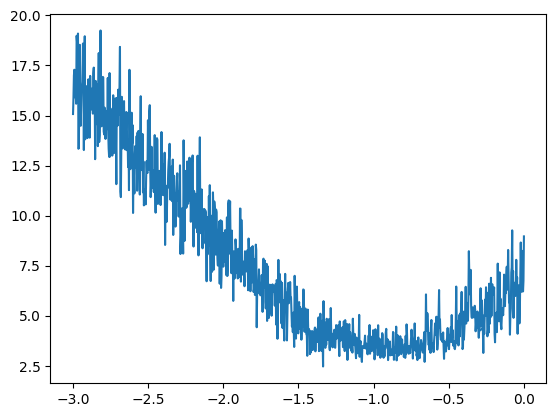

In [86]:
plt.plot(lri, lossi)

In [104]:
emb = C[X]
wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

2.253983974456787

In [105]:
def prompt(context, max_length=15, samples=1):
  for x in range(samples):
    out = context
    context2 = context[abs(len(context) - block_size):]
    length = 0
    cx = [0] * block_size
    cx = cx[len(context2):] + [stoi[c] for c in context2]
    while True:
      length += 1
      emb = C[cx]
      wi1 = emb.view(-1, 6) @ w1
      wi1b = wi1 + b1
      wi1ba = wi1b.tanh()
      wi2 = wi1ba @ w2
      logits = wi2 + b2
      counts = logits.exp()
      probs = counts / counts.sum(1, keepdim=True)
      char = itos[torch.multinomial(probs, num_samples=1).item()]
      if char == '.' or length==max_length:
        break
      out += char
    print(out)

prompt("bro", samples=10)

brousuesusru
brolsnrco
brorss
bronuunsd
brobvs
bro
bronsvsvenurs
brordcwnc
bronucsnnwduunvws
broheokrnnn


In [89]:
torch.randint(0, X.shape[0], (32,))

tensor([196564, 213278, 106614,  29057, 143688, 109960, 160066, 212979,  63432,
        142436,  68457,   7316, 226519,  94004, 124787, 179876, 116028, 158933,
         89467, 123841, 186248, 141393, 190137,  85981, 115109,  48461,  57874,
        191057,  48151,  18498,  98025, 136085])

In [ ]:
# train, val, test split
# 80%, 10%, 10%
